In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv(r"B:\OneDrive\Pictures\Screenshots\Fiewin screenshots\xlsx\1-8.csv", dtype = {'20240105264': int, '52389': int})
li = []
b_val = []
for i in df.iloc[:, 1]:
    last_digit = i % 10
    li.append(last_digit)
for i in li:
    if i%2 != 0:
        b_val.append(0)
    else:
        b_val.append(1)
df.iloc[:, 1] = b_val
df.head()
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train.reshape(-1, 1))
X_test = sc.transform(X_test.reshape(-1, 1))

In [14]:
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [15]:
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[37 53]
 [35 47]]
0.4883720930232558


In [17]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

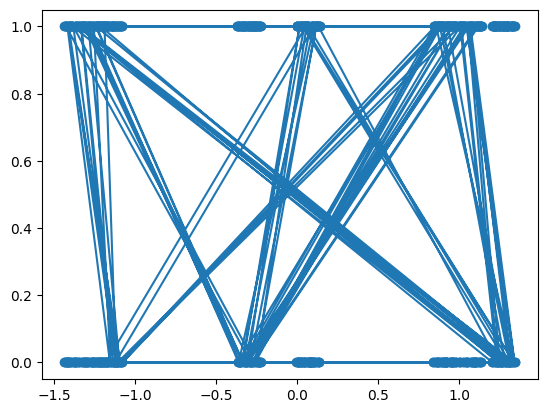

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()